<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Assignment_nyc_taxi_trip_duration_JasperBongers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing the dependencies
import numpy as np
import pandas as pd
import datetime as dt
from time import strftime
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from IPython.display import clear_output

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading the dataset
data = pd.read_csv('/content/drive/My Drive/Assignment_nyc_taxi_trip_duration_JasperBongers/nyc_taxi_trip_duration.csv')

In [6]:
# Head of the data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
# Tail of the data
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [8]:
# Analysis of the shape f the dataframe
data.shape
# The dataset consists of 729322 rows and 11 columns
# 729322 taxi trips and 11 features

(729322, 11)

In [9]:
# Analysis of the datatypes of the columns
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [10]:
# Geeting the info function:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [11]:
# Check for missing values
data.isnull().sum()
# Conclusion: no missing values

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [12]:
# Lets see the dataset description (for all numerical columns)
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [13]:
## cheaking if any duplicate values
data.duplicated().sum()
## no duplicated values

0

# Encoding

let's analyze each column in the provided data and suggest appropriate encoding techniques based on the nature of the data:

1. **id**: a unique identifier for each trip.

2. **Vendor_id**: a code indicating the provider associated with the trip record.

3. **Pickup_datetime**: date and time when the meter was engaged.

4. **Dropoff_datetime**: date and time when the meter was disengaged.

5. **Passenger_count**: the number of passengers in the vehicle (driver entered value).

6. **Pickup_longitude**: the longitude where the meter was engaged.

7. **pickup_latitude**: the latitude where the meter was engaged.

8. **Dropoff_longitude**: the longitude where the meter was disengaged.

9. **Dropoff_latitude**: the latitude where the meter was disengaged.

10. **Store_and_fwd _flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).

11. **trip_duration**: (target) duration of the trip in seconds.


# Integer Data Type


In [14]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


**vendor_id** -> it is okay for this to be an int64.

**passenger_count** -> very good for this to be an int64.

**trip_duration** -> number of seconds can be best translated into a datetime object. If we want to understand the duration of events in a more human-readable format (e.g., hours, minutes, seconds), converting the seconds into a timedelta object can be helpful.


In [15]:
# Assuming 'data' is your DataFrame and 'event_duration' is the column with the number of seconds
data['trip_duration'] = pd.to_timedelta(data['trip_duration'], unit='s')

In [16]:
# Verify if the trip_duration feature was changed into a Datetime object
data.info()
# Conclusion: Yes! properly converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  object         
 3   dropoff_datetime    729322 non-null  object         
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 61.2+ MB


# Float Data Type

In [17]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


Longitude and latitude values require precision, which is well-supported by the float64 data type.

So no need to convert these.

# Object Data Type

In [18]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'object']

,0
id,object
pickup_datetime,object
dropoff_datetime,object
store_and_fwd_flag,object


**pickup_datetime** -> good to convert into a datetime object.

**dropoff_datetime** -> good to convert into a datetime object.

**store_and_fwd_flag** -> good to convert this into 0's and 1's.



In [19]:
# Convert pickup_datetime and dropoff_datetime into a Datetime object
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [20]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  datetime64[ns] 
 3   dropoff_datetime    729322 non-null  datetime64[ns] 
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 61.2+ MB


In [21]:
# Use pd.get_dummies to convert 'store_and_fwd_flag' into numerical values
data = pd.get_dummies(data, columns=['store_and_fwd_flag'])

In [22]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  bool           
 11  store_and_fwd_flag_Y  729322 non-null  bool           
dtypes: bool(2), datetime64[ns](2), float64(4), i

In [23]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_N'] = data['store_and_fwd_flag_N'].astype('int64')

In [24]:
# Checking the unique values of store_and_fwd_flag_N
print(data['store_and_fwd_flag_N'].unique())

[1 0]


In [25]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_Y'] = data['store_and_fwd_flag_Y'].astype('int64')

In [26]:
# Checking if the datatype was converted properly
data.info()
# Successfully converted to int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  int64          
 11  store_and_fwd_flag_Y  729322 non-null  int64          
dtypes: datetime64[ns](2), float64(4), int64(4), 

In [27]:
# Checking the unique values of store_and_fwd_flag_Y
print(data['store_and_fwd_flag_Y'].unique())

[0 1]


### Datetimeobject

We can craate new Datetime objects by some simple calculations on Datetime objects


In [28]:
# Create a new variable real_trip_duration by taking the difference between pickup_datetime and dropoff_datetime
data['real_trip_duration'] = data['dropoff_datetime'] - data['pickup_datetime']

In [29]:
# Get the head function for dataframe data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,real_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0 days 00:06:40,1,0,0 days 00:06:40
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0 days 00:18:20,1,0,0 days 00:18:20
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0 days 00:27:15,1,0,0 days 00:27:15
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0 days 00:19:01,1,0,0 days 00:19:01
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0 days 00:14:08,1,0,0 days 00:14:08


In [30]:
# Comparing (target) trip_duration with real_trip_duration
data[['trip_duration', 'real_trip_duration']].sum()
# The (target) trip_duration with real_trip_duration are excately the same

,0
trip_duration,8037 days 23:34:16
real_trip_duration,8037 days 23:34:16


In [31]:
# Check if the columns are exactly the same
are_equal = data['trip_duration'].equals(data['real_trip_duration'])
print(f"The columns are exactly the same: {are_equal}")
# The (target) trip_duration with real_trip_duration are excately the same

The columns are exactly the same: True


In [32]:
# As real_trip_duration is excately the sale as trip_duration
# remove the column real_trip_duration from the dataset as it does not contain any new information.
data.drop('real_trip_duration', axis=1, inplace=True)

In [33]:
# Change trip_duration from a Datatime datatype to int64 in order to make the processing faster and consume less memory
data['trip_duration'] = data['trip_duration'].astype('int64')

In [34]:
# Check if both changes have been implemented properly
data.info()
# Conclusion: Yes!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memo

#### Create new features with the Datetime features


In [35]:
# Calculate and assign new columns to the dataframe such as weekday,
# Month and pickup_hour which will help us to gain more insights from the data.
data['weekday'] = data.pickup_datetime.dt.day_name() # Changed weekday_name to day_name()
data['month'] = data.pickup_datetime.dt.month
data['weekday_num'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

## Calculate distance between pickup and dropoff coordinates using geodesic.

In [36]:
# Import necessary libraries
from geopy.distance import geodesic
import pandas as pd
from tqdm import tqdm

# Define a function to calculate the geodesic distance
def calculate_distance(row):
    return geodesic(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude'])
    ).miles

# Use tqdm to apply the function with a progress bar
tqdm.pandas(desc="Calculating distances")
data['distance'] = data.progress_apply(calculate_distance, axis=1)

Calculating distances: 100%|██████████| 729322/729322 [02:12<00:00, 5513.57it/s]


In [37]:
# Checking dataframe data if the distance feature has been created properly
data.head()
# Conclusion: Yes, the distance feature looks good to go

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,weekday,month,weekday_num,pickup_hour,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400000000000,1,0,Monday,2,0,16,0.745502
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100000000000,1,0,Friday,3,4,23,2.562501
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635000000000,1,0,Sunday,2,6,17,4.505212
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141000000000,1,0,Tuesday,1,1,9,1.465371
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848000000000,1,0,Wednesday,2,2,6,2.689391


In [38]:
# Checking dataframe data if the distance feature has been created properly
data.info()
# Conclusion: Yes, the distance feature looks good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
 12  weekday               729322 non-null  object        
 13 

### Creating new Feature: Calculate Speed in miles/hr for further insights

In [39]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [40]:
# Checking dataframe data if the speed feature has been created properly
data.head()
# Conclusion: Yes, the speed feature looks good to go

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,weekday,month,weekday_num,pickup_hour,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400000000000,1,0,Monday,2,0,16,0.745502,6.709522e-09
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100000000000,1,0,Friday,3,4,23,2.562501,8.386366e-09
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635000000000,1,0,Sunday,2,6,17,4.505212,9.919733e-09
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141000000000,1,0,Tuesday,1,1,9,1.465371,4.623433e-09
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848000000000,1,0,Wednesday,2,2,6,2.689391,1.141723e-08


In [41]:
# Checking dataframe data if the speed feature has been created properly
data.info()
# Conclusion: Yes, the speed feature looks good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
 12  weekday               729322 non-null  object        
 13 

## Updated list of features

let's analyze each column in the provided data and suggest appropriate encoding techniques based on the nature of the data:

1. **id**: a unique identifier for each trip.

2. **Vendor_id**: a code indicating the provider associated with the trip record.

3. **Pickup_datetime**: date and time when the meter was engaged.

4. **Dropoff_datetime**: date and time when the meter was disengaged.

5. **Passenger_count**: the number of passengers in the vehicle (driver entered value).

6. **Pickup_longitude**: the longitude where the meter was engaged.

7. **pickup_latitude**: the latitude where the meter was engaged.

8. **Dropoff_longitude**: the longitude where the meter was disengaged.

9. **Dropoff_latitude**: the latitude where the meter was disengaged.

10. **trip_duration**: (target) duration of the trip in seconds.

11. **store_and_fwd_flag_N**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).

12. **store_and_fwd_flag_Y**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).

13. **weekday**: We used the datetime object to get the day of the week of the trip.

14. **month**: We used the datetime object to get the month of the trip.

15. **weekday_num**: We used the datetime object to get the weekday number of the trip.

16. **pickup_hour**: We used the datetime object to get the hour of the pickup of the trip.

17. **distance**: We have used the geospecial data (longitude and lattitude) to calculate the distance between PickUp Location and the DropOff Location..

18. **speed**: We have calculated the average speed as the distance dvided by the trip duration.


# Univariate analysis


Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable.

## 1. Id

In [42]:
# There are 729322 Unique id's which represent each row in the data
data.id.nunique()

729322

## 2. vendor_id

In [43]:
# There are 2 Unique id's which represent each row in the data
data.vendor_id.nunique()

2

In [44]:
# These are 1 and 2
data.vendor_id.unique()

array([2, 1])

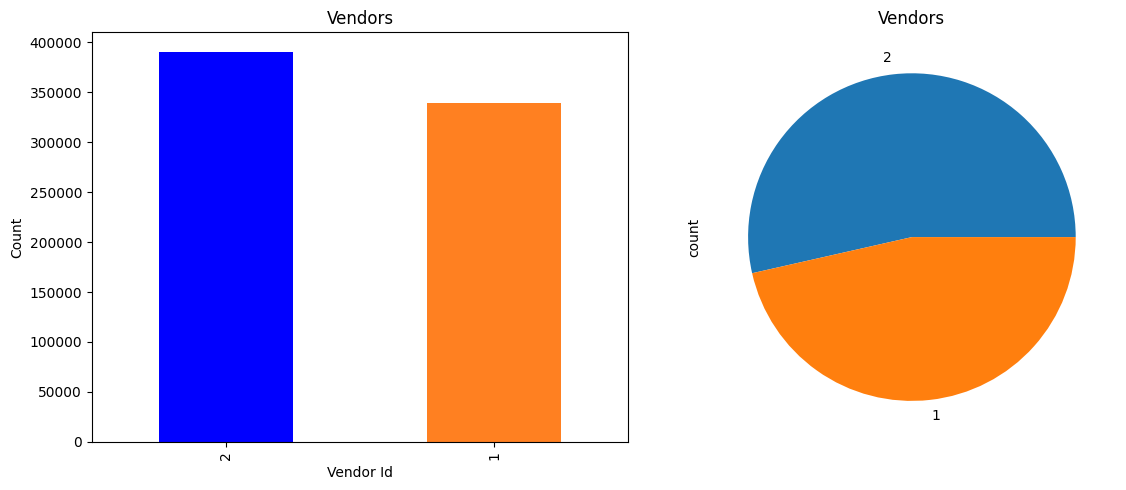

In [45]:
# Visualising vendor_id
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = data['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
data['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

## 3. pickup_datetime

In [46]:
# There are 709359 Unique id's which represent each row in the data
data.pickup_datetime.nunique()

709359

In [47]:
# There are so many unique timestamps
data.pickup_datetime.unique()

<DatetimeArray>
['2016-02-29 16:40:21', '2016-03-11 23:35:37', '2016-02-21 17:59:33',
 '2016-01-05 09:44:31', '2016-02-17 06:42:23', '2016-02-14 18:31:42',
 '2016-04-20 20:30:14', '2016-06-19 16:48:14', '2016-03-28 19:17:03',
 '2016-04-10 22:01:41',
 ...
 '2016-01-01 00:47:30', '2016-02-05 11:24:34', '2016-03-21 03:43:03',
 '2016-06-28 06:41:53', '2016-01-25 22:31:56', '2016-05-21 13:29:38',
 '2016-02-22 00:43:11', '2016-04-15 18:56:48', '2016-06-19 09:50:47',
 '2016-01-01 17:24:16']
Length: 709359, dtype: datetime64[ns]

In [48]:
# There are so many unique timestamps, but all of them between Januari 2016 to June 2016
data.pickup_datetime.describe()

,pickup_datetime
count,729322
mean,2016-04-01 11:17:42.123299584
min,2016-01-01 00:01:14
25%,2016-02-17 18:46:36.249999872
50%,2016-04-01 17:30:37.500000
75%,2016-05-15 07:13:01.249999872
max,2016-06-30 23:59:37


## 4. dropoff_datetime

In [49]:
# There are 709308 Unique id's which represent each row in the data
# Please note that this is a lower number than the number of unique values of pickup_datetime which can of course happen
data.dropoff_datetime.nunique()

709308

In [50]:
# There are so many unique timestamps
data.dropoff_datetime.unique()

<DatetimeArray>
['2016-02-29 16:47:01', '2016-03-11 23:53:57', '2016-02-21 18:26:48',
 '2016-01-05 10:03:32', '2016-02-17 06:56:31', '2016-02-14 18:55:57',
 '2016-04-20 20:36:51', '2016-06-19 17:06:35', '2016-03-28 19:48:29',
 '2016-04-10 22:25:30',
 ...
 '2016-05-28 15:41:19', '2016-01-01 01:12:56', '2016-02-05 11:46:39',
 '2016-03-21 04:05:21', '2016-06-28 06:43:43', '2016-01-25 22:39:25',
 '2016-05-21 13:34:34', '2016-04-15 19:08:01', '2016-06-19 09:58:14',
 '2016-01-01 17:44:40']
Length: 709308, dtype: datetime64[ns]

In [51]:
# There are so many unique timestamps, but all of them between Januari 2016 to July 1st 2016
data.dropoff_datetime.describe()

,dropoff_datetime
count,729322
mean,2016-04-01 11:33:34.352432128
min,2016-01-01 00:05:54
25%,2016-02-17 19:00:30.500000
50%,2016-04-01 17:46:47.500000
75%,2016-05-15 07:38:40.500000
max,2016-07-01 23:02:03


## 5. passenger_count

In [52]:
# Get the value_counts of passenger_count
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
data.passenger_count.value_counts()

,count
passenger_count,
1,517415
2,105097
5,38926
3,29692
6,24107
4,14050
0,33
7,1
9,1


## Observations

1. There are some trips with 0 passenger count.

2. Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency

3. Most of trip consist of passenger either 1 or 2.


# 6. Distance

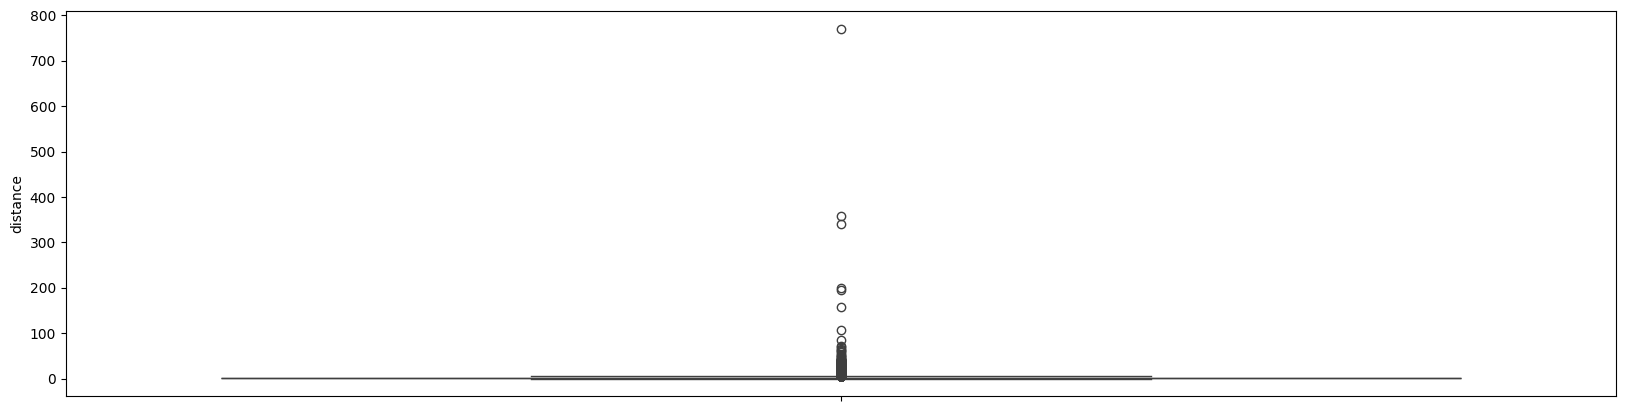

In [53]:
# Visulise distance
plt.figure(figsize = (20,5))
sns.boxplot(data.distance)
plt.show()

In [54]:
print(f"There are {data.distance[data.distance == 0 ].count()} trip records with 0 miles distance")

There are 2901 trip records with 0 miles distance


### Observations:

- mean distance travelled is approx 2.1 miles.

- There some trips with over 60 miles distance.

- Some of the trips distance value is 0 miles.

There are approximately 6,000 trip records with a distance of 0 kilometers.
Below are some possible explanations for these records:
- The customer may have changed their mind and canceled the journey immediately after accepting it.

- The software might not have recorded the drop-off location correctly, resulting in the drop-off location being the same as the pickup location.

- There could have been an issue with the GPS tracker while the journey was concluding.
The driver may have canceled the trip shortly after accepting it, preventing the journey from starting.

- Alternatively, there could be a technical issue with the software that requires further investigation by a technical expert.

- Additionally, there are significant inconsistencies in the data where the drop-off location matches the pickup location. We cannot impute distance values based on a correlation with trip duration because the coordinates for the drop-off location would not align with the expected distance. We will further explore this issue in our bivariate analysis of trip duration.

<ipython-input-55-1b8993c0aa47>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.distance.groupby(pd.cut(data.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))


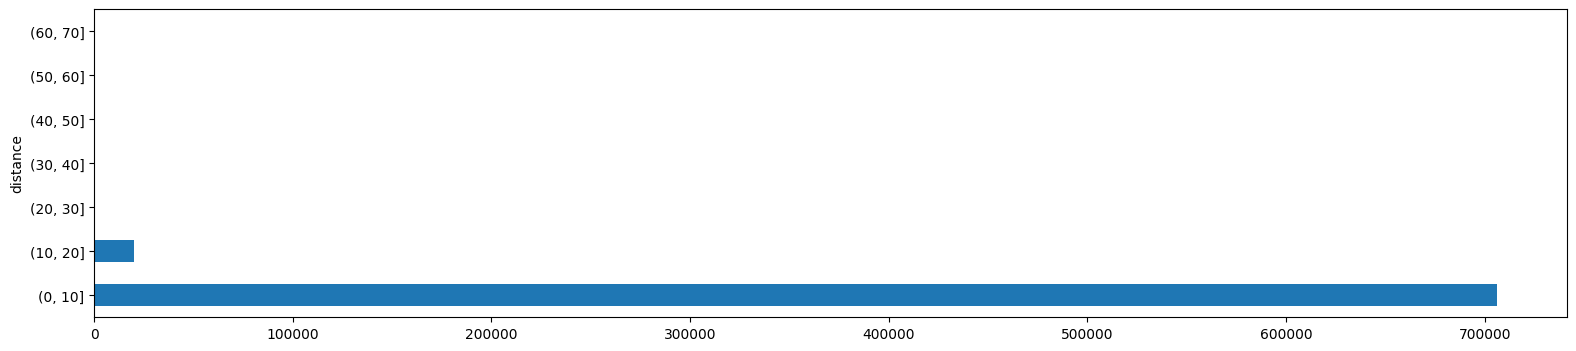

In [55]:
data.distance.groupby(pd.cut(data.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()

From the above observation it is evident that most of the rides are completed between 1-10 miles with some of the rides with distances between 10-30 miles. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

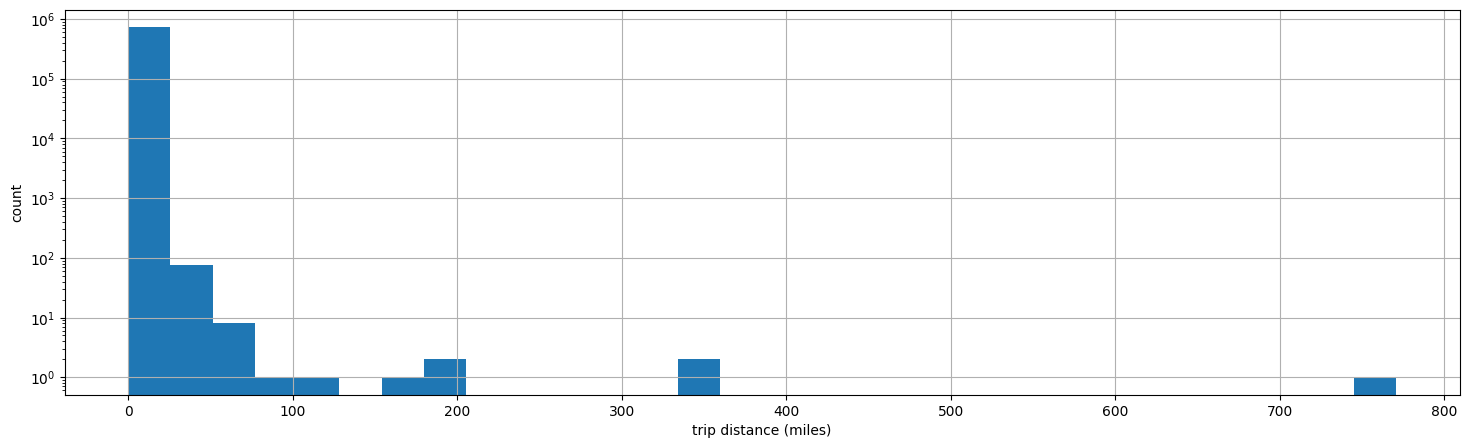

In [56]:
# Visualise the distance feature
ax = data['distance'].hist(bins=30, figsize=(18,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (miles)")
ax.set_ylabel("count")
plt.show()

According to the dustribution of trip distances and the fact that it takes about 30 miles to drive across the whole New York City, we decided to use 30 as the number to split the trips into short or long distance trips.

In [57]:
df_short = data[data.distance <= 30].count()
df_long = data[data.distance > 30].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")

Short Trips: 729267 records in total.
Long Trips: 55 records in total.


<ipython-input-57-ffd561f13462>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")


# 7. Trip duration

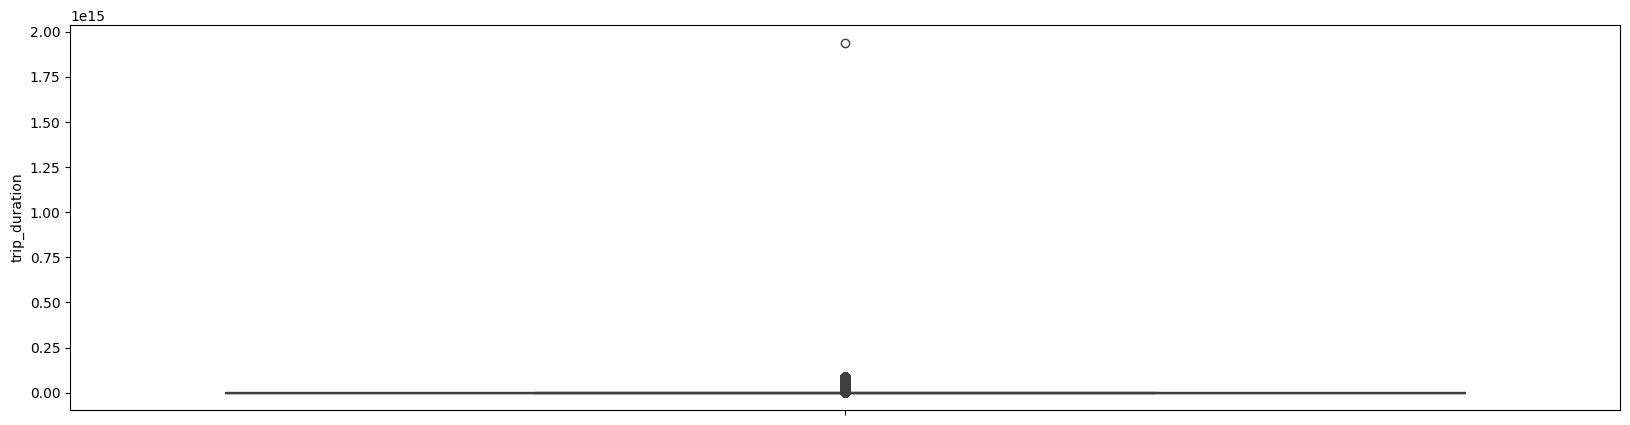

In [58]:
# Visualisation of trip_duration
plt.figure(figsize = (20,5))
sns.boxplot(data.trip_duration)
plt.show()

In [59]:
import pandas as pd
import numpy as np

# Define the maximum trip duration to limit the number of bins
max_duration = data['trip_duration'].max()
max_limit = min(max_duration, 3600 * 24)  # Limit to 24 hours

# Group and count the trip durations
trip_duration_bins = pd.cut(data['trip_duration'], np.arange(1, max_limit, 3600))
trip_duration_counts = data['trip_duration'].groupby(trip_duration_bins).count()

print(trip_duration_counts)

trip_duration
(1, 3601]         0
(3601, 7201]      0
(7201, 10801]     0
(10801, 14401]    0
(14401, 18001]    0
(18001, 21601]    0
(21601, 25201]    0
(25201, 28801]    0
(28801, 32401]    0
(32401, 36001]    0
(36001, 39601]    0
(39601, 43201]    0
(43201, 46801]    0
(46801, 50401]    0
(50401, 54001]    0
(54001, 57601]    0
(57601, 61201]    0
(61201, 64801]    0
(64801, 68401]    0
(68401, 72001]    0
(72001, 75601]    0
(75601, 79201]    0
(79201, 82801]    0
Name: trip_duration, dtype: int64


<ipython-input-59-2a12f3625500>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_duration_counts = data['trip_duration'].groupby(trip_duration_bins).count()


1. Some trip durations exceed 100,000 seconds, which are clear outliers and should be excluded from the analysis.

2. There are instances of trip durations as short as 1 second, indicating trips with a distance of 0 kilometers.

3. The majority of trip durations fall within the range of 10 to 20 minutes.

4. The mean and mode of the trip durations differ, suggesting that the distribution is skewed to the right.

- Some trips lasted for over 20 days, which seems implausible given the distances traveled.

- All these trips were conducted by Vendor 1, suggesting that this vendor may permit significantly longer trips for outstation services.

- Notably, these trips occurred exclusively on Tuesdays in the first month or Saturdays in the second month. This pattern may indicate a relationship between the day of the week, pickup location, month, and passenger behavior.

- However, these anomalies hinder our ability to make accurate predictions and introduce inconsistencies in the algorithm's calculations.

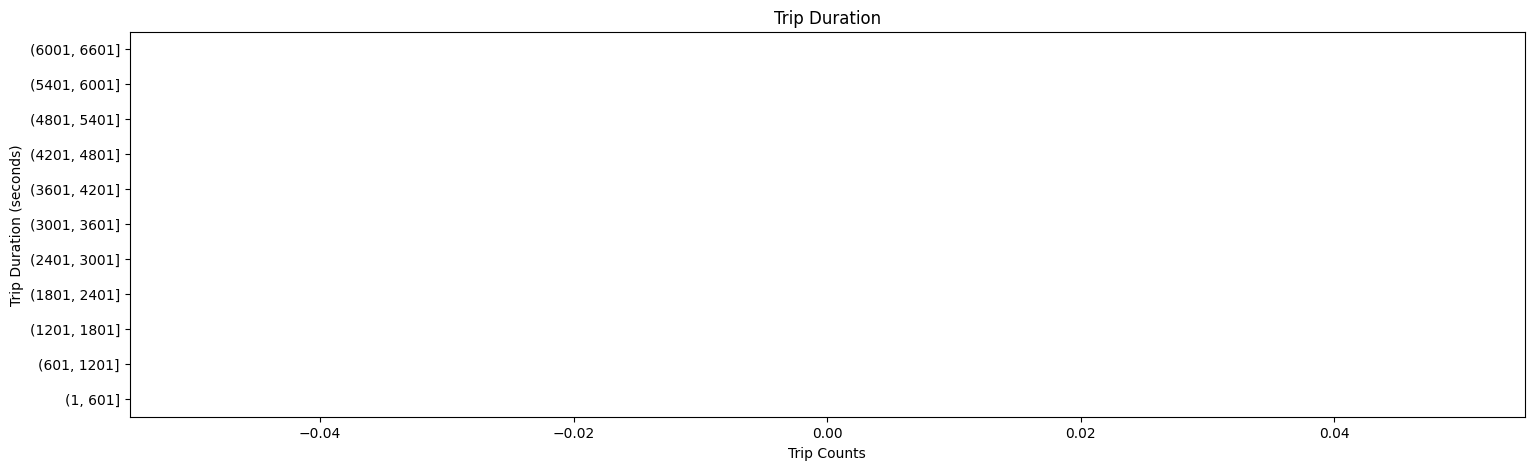

In [64]:
# visualize the number of trips taken in bins of 0-10, 20-30 minutes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the bin edges
bin_edges = np.arange(1, 7200, 600)

# Group and count the trip durations
trip_duration_bins = pd.cut(data['trip_duration'], bin_edges)
trip_duration_counts = data['trip_duration'].groupby(trip_duration_bins, observed=False).count()

# Plot the results
trip_duration_counts.plot(kind='barh', figsize=(18, 5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# 8. Speed

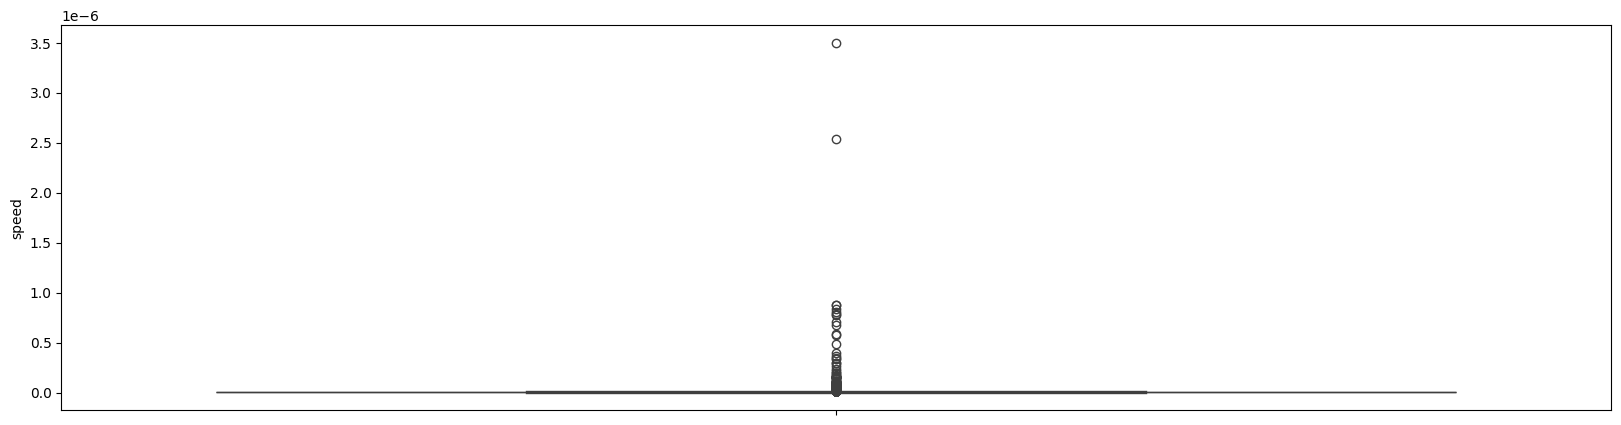

In [66]:
# Visuaisation of speed
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

### Observations
- Many trips were done at a speed of over 125 mile/h. Going SuperSonic..!!
- I choose to remove them and focus on the trips which were done at less than 65 mile/h as per the speed limits

<ipython-input-67-fa4af9157c77>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.speed.groupby(pd.cut(data.speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (19,5))


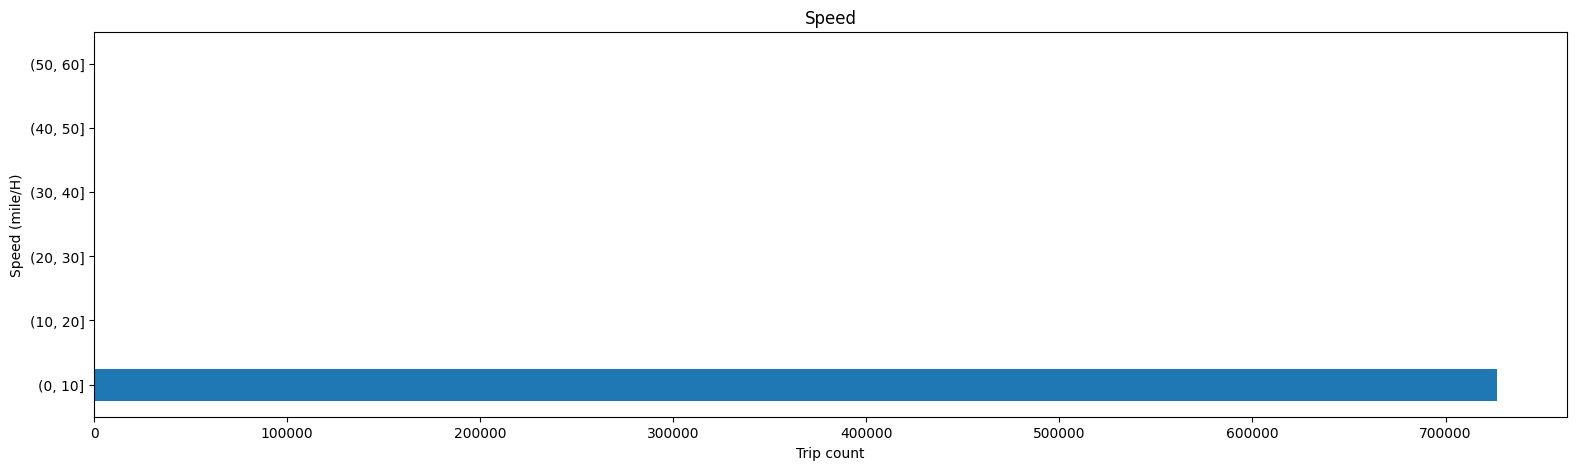

In [67]:
data = data[data.speed <= 65]
data.speed.groupby(pd.cut(data.speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')
plt.show()

### Conclusions
- Trips over 15 miles/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 65 mile/h on state controlled highways.

- Mostly trips are done at a speed range of 6-12 miles/h with an average speed of around 8 miles/h.

- It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 6-12 miles/H.

# 9: Total trips Per Hour

In [69]:
# Visualise the distribution of the pickups across the 24 hour time scale.

def clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)


    # width of each bin on the plot
    width = (2*np.pi) / N

    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)


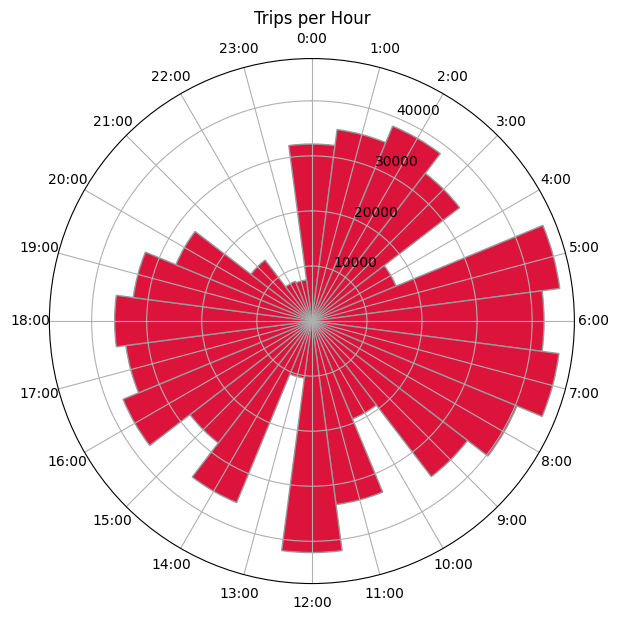

In [70]:
plt.figure(figsize = (15,15))
ax = plt.subplot(2,2,1, polar=True)
    # make the histogram that bined on 24 hour
radii = np.array(data['pickup_hour'].value_counts(sort = False).tolist(), dtype="int64")
title = "Trips per Hour"
clock(ax, radii, title, "#dc143c")

### Observations

The data aligns with the general trend of taxi pickups, which typically begin to rise around 6 AM and decline in the late evening, around 8 PM. There are no unusual patterns observed in this behavior. The peak number of pickups occurs between 6 PM and 7 PM.

# 10. Total trips per weekday

In [ ]:
# Visualise the feature weekday_num
plt.figure(figsize = (14,5))
sns.countplot(data.weekday_num)
plt.xlabel(' WeekDay ')
plt.ylabel('Trip counts')
plt.title('Trips per Day',fontsize = 20)
plt.show()

### Observations

Here we can see an increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.

In [ ]:
# Visualise the hourwise pickup pattern across the week
n = sns.FacetGrid(df, col='weekday_num')
n.map(plt.hist, 'pickup_hour')
plt.show()

### Observations

- Taxi pickups have increased during late-night hours over the weekend, likely due to a rise in outstation rides or late-night leisure activities nearby.

- Additionally, early morning pickups (before 5 AM) have seen an uptick over the weekend compared to pickups during office hours (after 7 AM), which have decreased for obvious reasons.

- Overall, taxi pickups appear to remain consistent throughout the week, with a notable peak at 3 PM.

# 11. Total trips per month

In [ ]:
# Visualise Total trips per month
plt.figure(figsize = (19,5))
sns.countplot(data.month)
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.title('Trips per Month',fontsize = 20)
plt.show()

### Observation

Quite a balance across the months here. It could have been more equivalent if we wouldn't have removed the inconsistent records in our study of the univariate analysis

## Distribution

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset

data_subset = data.iloc[:10000]  # Take the first 10,000 rows

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i + 1)
    # Limit the number of bins to avoid excessive memory usage
    try:
        plt.title(f'Distribution of {column}')
        sns.histplot(data_subset[column], kde=True, bins=30)
        plt.xticks(rotation=45)
    except MemoryError:
        print(f"MemoryError: Skipping column {column} due to memory constraints")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

In [ ]:
# Select only the numercial data
numerical_data = data.select_dtypes(include=['int64', 'float64'])
# Remove id , vendor_id, store_and_fwd_flag_N, store_and_fwd_flag_Y, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
numerical_data = numerical_data.drop(['vendor_id', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [ ]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

from scipy import stats

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(data_subset[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


In [ ]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

# Taking a subset to minimize impact on memory
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Outliers


In [ ]:
# For the outlier analysis we cannot take a subset.

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(numerical_data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Bivariate analysis

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 1: Bivariate analysis Trip Duration per hour

We need to aggregate the total trip duration to plot it against the month. The aggregation measure can be any of the following: sum, mean, median, or mode. Since we have already conducted an outlier analysis, we can use the mean for visualization. This approach should effectively represent the pattern without introducing bias into the general trend.

In [ ]:
# Visualise trip duration per hour by analysis pickup_hour with trip_duration
plt.figure(figsize = (14,5))
group1 = data.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

### Observation

- Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

- Average trip duration is generally highest around 3 PM during the busy streets.

- Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

# 2. Trip duration per WeekDay

In [ ]:
# Visualise trip duration per hour by analysis weekday_num with trip_duration
plt.figure(figsize = (14,5))
group2 = data.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

### Observation

Trip durations are nearly evenly distributed throughout the week, ranging from 0 to 1,000 minutes, with only minimal variations in duration times. Notably, Thursday has the longest trip durations compared to the other days.

# 3. Trip duration per Month

In [ ]:
# Visualise trip duration per hour by analysis month with trip_duration
plt.figure(figsize = (14,5))
group3 = data.groupby('month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

### Observations

Analysis of Average Trip Duration Trends
We observe an increasing trend in the average trip duration over the subsequent months. While the differences in duration from month to month are not significant, there has been a gradual increase over a six-month period.
The lowest average trip duration occurs in February, coinciding with the decline of winter.
Seasonal factors, such as wind and rain, may contribute to this gradual rise in trip duration. For instance, May is typically considered the wettest month in New York City, which aligns with our visualization. Increased rainfall often leads to longer travel times due to traffic congestion during the rainy season, resulting in naturally longer trip durations in April, May, and June.

# 4. Trip duration per vendor

In [ ]:
# Visualise vendor_id with trip_duration
group4 = data.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

### Observation

Vendor Performance Comparison

Vendor 2 stands out with a higher average trip duration compared to Vendor 1, though the difference is relatively small.

# 5. Distance per hour

Analyzing Distance Distribution Across Variables

Next, let's examine how trip distance is distributed across various variables. We expect that trip distance should be roughly proportional to trip duration, assuming we disregard general traffic conditions and other road factors.

Now, let's visualize this relationship for each hour.

Since we have already conducted an outlier analysis for this variable, we can use the mean as our aggregate measure for the visualizations.

In [ ]:
# Visualise pickup_hour with distance
plt.figure(figsize = (14,5))
group5 = df.groupby('pickup_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per Hour')
plt.show()

### Observation

Analysis of Trip Distance Trends

Trip distances are highest during the early morning hours, which may be attributed to several factors, including:

Outstation trips taken over the weekends.
Longer journeys to the city airport, located on the outskirts.

Throughout the day, trip distances remain relatively consistent, ranging from 2 to 2.5 miles from morning until evening.

However, distances begin to increase gradually during the late night hours, starting in the evening and continuing until 5 AM, before steeply declining as morning approaches.

# 6. Distance per WeekDay

In [ ]:
# Visualise weekday_num with distance
plt.figure(figsize = (14,5))
group6 = df.groupby('weekday_num').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (mile)')
plt.title('Distance per WeekDay')
plt.show()

### Observations

The distribution of trip distances is fairly consistent, with an average distance of approximately 2 miles per hour.

Sundays tend to have the highest average distance, likely due to outstation trips or late-night journeys to the airport.

# 7.Distance per Month

In [ ]:
# Visualise month with distance
plt.figure(figsize = (14,5))
group7 = data.groupby('month').distance.mean()
sns.pointplot(group7.index, group7.values)
plt.ylabel('Distance (mile)')
plt.xlabel('Month')
plt.title('Distance per Month')
plt.show()

### Observation

In this case, the distribution is nearly uniform, with average distances primarily around 3.5 km. The fifth month records the highest average distance, while the second month shows the lowest.

# 8. Distance per Vendor

In [ ]:
# Visualise vendor_id with distance
group8 = data.groupby('vendor_id').distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance mile")
plt.xlabel("Vendor")
plt.title('Distance per Vendor')
plt.show()

### Observation

Vendor Comparison:

The analysis reveals a similar pattern for both vendors, leaving little additional insight to explore.

# 9. Distance vs Trip duration

In [ ]:
# Visualise trip_duration with distance
plt.figure(figsize = (10,5))
plt.scatter(data.trip_duration, df.distance , s=5, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

### Observations

Analysis of Trip Duration and Distance
Many trips recorded negligible distances while exceeding 20,000 seconds in duration. Initially, the graph shows a clear correlation between distance covered and trip duration; however, this correlation diminishes later on.

Additionally, there were a few trips that covered significant distances of approximately 120 miles in a very short time frame, which is unlikely and should be classified as outliers.

Let’s focus on the section of the graph where the distance is less than 30 miles and the duration is under 1,000 seconds.

In [ ]:
# Visualise Distance vs Trip Duration
plt.figure(figsize = (10,5))
dur_dist = df.loc[(data.distance < 30) & (data.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance vs Trip Duration')
plt.show()

Analysis of Trip Duration and Distance Relationship

Ideally, there should be a linear relationship between the distance covered and trip duration on average. However, we observe a dense cluster of trips in the lower right corner, indicating many trips with inconsistent readings.

To enhance the consistency of our data for the predictive model, we should remove trips that recorded a distance of 0 miles but had a duration of more than 1 minute. We assume that if a trip was canceled shortly after booking, it should not have taken more than a minute.

# 10. Average speed per hour

In [ ]:
# Visualise Average Speed per Hour
plt.figure(figsize = (14,5))
group9 = data.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per Hour')
plt.show()

### Observations

The average speed trend aligns well with typical conditions. Average taxi speeds tend to increase after late evening and continue to rise gradually until the early morning hours.

The highest average taxi speed occurs at 5 AM, after which it declines sharply as office hours approach. During office hours, from 8 AM to 6 PM, the average taxi speed remains relatively consistent.

#Data Preprocessing

### PLanning:
1) Remove redudant columns

2) Creating new derrived features

3) Removing outliers

4) Scaling the data




# 11. Average speed per weekday

In [ ]:
# Visualise Average Speed per WeekDay
plt.figure(figsize = (14,5))
group10 = df.groupby('weekday_num').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.xlabel('Pick Up WeekDay')
plt.ylabel('Speed mile/h')
plt.title('Average Speed per WeekDay')
plt.show()

### Observations

Analysis of Average Taxi Speed Trends
Average taxi speeds are higher on weekends compared to weekdays, which is expected due to the influx of office workers and business owners during the week. Interestingly, average taxi speeds on Mondays are also elevated, which is surprising given that it is typically one of the busiest days following the weekend.

Several factors may contribute to this phenomenon:

Many customers return from outstation trips in the early hours of Monday, before 6 AM, to make it to the office on time.

Early morning passengers arriving from airports after vacations may also be heading to their offices or businesses for the upcoming week.

There may be additional local factors influencing this trend that only residents would know about.

Furthermore, we cannot overlook the anomalies present in the dataset, which can be challenging to identify within such a large volume of data.

# 12. Passenger count per vendor

Analyzing Passenger Count

Let's explore a different metric in our analysis: passenger count. We will plot this metric against the vendor only, as it would not be particularly useful to compare it with hour, weekday, or month. Passenger count should be represented as a whole number rather than a ratio.

We will use the mean as our aggregate measure since we have already conducted an outlier analysis on this metric, ensuring that our results are not skewed by extreme values. Using the median would yield a value of 1, as the majority of trips are taken by single passengers.

Now, let’s examine the distribution of passenger counts.

In [ ]:
# Visualise Passenger Count per Vendor
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.xlabel('Vendor Id')
plt.title('Passenger Count per Vendor')
plt.show()

### Observations

Comparison of Average Passenger Count by Vendor

There is a clear distinction between the two vendors regarding the average passenger count for all trips. It appears that trips from Vendor 2 typically accommodate 2 passengers, while trips from Vendor 1 generally have 1 passenger. Let’s delve deeper into this analysis.

It seems that Vendor 2 primarily serves larger vehicles, including minivans, which contributes to their higher average passenger count. This vendor has a significant share of trips with more than one passenger, further explaining their greater market presence.

# 13. Pick Up Points v/s Dropoff Points

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df['pickup_longitude'].values, df['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df['dropoff_longitude'].values, df['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### Observations

Analysis of Pickup and Dropoff Locations
The pickup data clearly indicates that the majority of trips are concentrated in the Manhattan area, suggesting it is a highly populated location for pickups. In contrast, the drop-off locations are more dispersed compared to pickups.

As noted in the distance analysis, the average trip distance is 2.1 miles, which accounts for the significant volume of drop-offs within Manhattan itself.

# Feature Engineering

# 1) Removing redundant features

In [ ]:
data = data.drop(['id','vendor_id', ],axis = 1)

#2) Creating new derrived features

### 1) Creating a new distance feature by comparing the longitude and latitude features.
### 2) Creating new features of the datetime to capture the moment of thye week and to moment in the day


#Removing Outliers

In [ ]:
data.describe()

# Conclusions w.r.t. Outliers

We see potential outliers at the following features...

1) trip_duration -> 1.939736e+15 seconds is a lot

2) distance -> there are some very high numbers


#### Handling outliers @ trip_duration

In [ ]:
data.trip_duration.describe()

In [ ]:
data['trip_duration'].quantile(0.25), data['distance'].quantile(0.75)

In [ ]:
IQR = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
IQR

In [ ]:
Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

#### Handling outliers @ distance

In [ ]:
data.distance.describe()

In [ ]:
data['distance'].quantile(0.25), data['distance'].quantile(0.75)

In [ ]:
IQR = data['distance'].quantile(0.75) - data['distance'].quantile(0.25)
IQR

In [ ]:
Q1 = data['distance'].quantile(0.25)
Q3 = data['distance'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

In [ ]:
df_df_og = df.copy()
# Drop the columns specified in the num_cols list from the DataFrame df.
# The axis=1 parameter indicates that columns are being dropped (as opposed to rows).
df = df.drop(columns = num_cols,axis = 1)
# Merging the Standardized Columns Back into the DataFrame
# The how="left" parameter specifies a left join,
# meaning all rows from the original DataFrame df will be retained,
# and the corresponding rows from the scaled DataFrame will be added.
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

# Isolating the dependent (output/target) variable

In [ ]:
y_all = df.churn
df = df.drop(['churn','customer_id','occupation'],axis = 1)

### Train Test Split to create a validation set

In [ ]:
x = data.iloc[:, [1, 4, 11, 12, 14, 15, 16]].values
y = data.iloc[:,10].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

In this analysis, we observe that six variables are sufficient to capture at least 99% of the variance in the training dataset. Therefore, we will proceed with this set of variables, indicating that the model does not require the use of Principal Component Analysis (PCA).

# 3. Correlation Analysis

Correlation Analysis Overview
Correlation analysis is a statistical method used to assess the strength of the relationship between two or more continuous variables that are numerically measured. This analysis is valuable for identifying potential connections between variables. For our analysis, we will utilize a heatmap.

### Heatmap

In [ ]:
plt.figure(figsize=(15,15))
corr = pd.DataFrame(x_train[:,0:]).corr()
corr.index = pd.DataFrame(x_train[:,0:]).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Correlation Findings

Some feature combinations exhibit a slight correlation, while most features show no correlation at all.

Additionally, there is no evidence of negative correlation among the variables.


# Model

We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set.

Since our dependent variable contains continous values so we will use regression technique to predict our output. We will try almost every Regression model (except SVR)

### 1: Data Cleaning

Outlier Analysis
Our analysis indicates that there are no null values in the dataset; however, we have identified numerous outliers in the Speed, Distance, and Trip Duration variables. These outliers need to be removed, as failing to address them could adversely affect the model's performance.

# 2. Model Training

# 1. Multiple Linear Regression

In [ ]:
start_time = time.time()
lm_regression = LinearRegression()
lm_regression = lm_regression.fit(x_train, y_train)
end_time = time.time()
lm_time = (end_time - start_time)
print(f"Time taken to train linear regression model : {lm_time} seconds")

In [ ]:
trips = lm_regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the above graph, we can see that there is quite difference between predicted values and Actual values

Let's check the r2_score value

In [ ]:
lm_score = r2_score(y_test, trips)
print(lm_score)

he r2_score is above 0.5 which is a good thing but it is quite low for a regression model.

Let's Move towards next Model

# 2. Decision Tree

Overview of Decision Trees
A decision tree is a predictive modeling technique utilized in statistics, data mining, and machine learning. It employs a tree-like structure to represent decisions, where the branches correspond to observations about an item and the leaves indicate the conclusions regarding the item's target value.

In [ ]:
start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision tree model : {dt_time} seconds")
Ti

In [ ]:
trips = dt_regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the above graph, we can see that difference is quite low between predicted values and Actual values

Let's check the r2_score value

In [ ]:
dt_score = r2_score(y_test, trips)
print(dt_score)

The r2 score is best but the time taken for execution is high

So, Let's check if we can get same accuracy with less execution time in next model.

# 3. Random Forest

Overview of Random Forests
Random forests, also known as random decision forests, are an ensemble learning method used for classification, regression, and other tasks. This approach involves constructing a large number of decision trees during the training phase. For classification tasks, the model outputs the class that appears most frequently among the individual trees, while for regression tasks, it provides the average prediction from all the trees.

In [ ]:
start_time = time.time()
rf_regression = RandomForestRegressor()
rf_regression = rf_regression.fit(x_train, y_train)
end_time = time.time()
rf_time = (end_time - start_time)
print(f"Time taken to train Random Forest model : {rf_time} seconds")

In [ ]:
trips = rf_regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
rf_score = r2_score(y_test, trips)
print(rf_score)

# 4. AdaBoost

In [ ]:
start_time = time.time()
regression = AdaBoostRegressor()
regression = regression.fit(x_train, y_train)
end_time = time.time()
ad_time = (end_time - start_time)
print(f"Time taken to train AdaBoost model : {ad_time} seconds")

In [ ]:
trips = regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
ad_score = r2_score(y_test, trips)
print(ad_score)

# 5. Gradient Boost

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees

In [ ]:
start_time = time.time()
regression = GradientBoostingRegressor()
regression = regression.fit(x_train, y_train)
end_time = time.time()
gd_time = (end_time - start_time)
print(f"Time taken to train Gradient Boost model : {gd_time} seconds")

In [ ]:
trips = regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
gd_score = r2_score(y_test, trips)
print(gd_score)

@ 6. XGBoost

In [ ]:
start_time = time.time()
regression = XGBRegressor(objective ='reg:squarederror')
regression = regression.fit(x_train, y_train)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost  model : {xgb_time} seconds")

In [ ]:
trips = regression.predict(x_test)

In [ ]:
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': trips.flatten()})

In [ ]:
predictions

### Accuracy Metrics

In [ ]:
predictions.sample(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
xgb_score = r2_score(y_test, trips)
print(xgb_score)

# Model Comparison

Lets Analysis all the model we train based on their r2_score and time taken for execution.

In [ ]:
r2 = [lm_score, dt_score, rf_score, ad_score, gd_score, xgb_score]
tm = [lm_time, dt_time, rf_time, ad_time, gd_time, xgb_time]
comp = pd.DataFrame({'Time': tm, 'Accu': r2})

In [ ]:
label = ['LM', 'DT', 'RF', 'ADB', 'GDB', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comp['Time'].plot(kind='bar',title="Time",ax=axes[0],color = (1, 0.5, 0.13))
ax1 = comp['Accu'].plot(kind='bar',title="Accuarcy",ax=axes[1])
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()

Model Selection Analysis


Based on the figure above, we can determine the most suitable model for this dataset.
We can immediately rule out Random Forest, as it requires the most time to train.

AdaBoost is faster than Random Forest but yields the lowest accuracy among all the models tested. Linear Regression takes the least amount of time to train, but it does not provide satisfactory accuracy.


This leaves us with Decision Tree, Gradient Boost, and XGBoost. All three models demonstrate similar accuracy levels, but the Decision Tree stands out for its minimal training time.

# Conclusion

Conclusion of Data Analysis


Based on our comprehensive data analysis and visualization, we evaluated six of the most effective algorithms. We concluded that the Decision Tree algorithm is the most suitable choice for this scenario, as it provides the best accuracy with the least amount of training time.

In summary, we conclude that the Decision Tree algorithm is the optimal choice for this dataset.

In [ ]:
# The end